In [1]:
import numpy as np
import matplotlib.pyplot as plt

def mesh_grid_visual(X, y, model, label_dict = None):
    x0 = np.linspace(np.min(X[:,0])-2, np.max(X[:,0])+2, 100)
    x1 = np.linspace(np.min(X[:,1])-2, np.max(X[:,1])+2, 100)
    a,b = np.meshgrid(x0, x1)
    X_new = np.c_[a.ravel(), b.ravel()]
    predictions = model.predict(X_new)
    if "sklearn" in str(type(model)):
        decision = model.decision_function(X_new)
    else:
        decision = model.predict_probs(X_new)
    plt.contourf(x0, x1, predictions.reshape(a.shape), cmap=plt.cm.brg, alpha = 0.4)
    plt.contourf(x0, x1, decision.reshape(a.shape), cmap=plt.cm.brg, alpha = 0.2)
    for yy in np.unique(y):
        if label_dict != None:
            plt.scatter(X[y == yy, 0], X[y==yy, 1], label = label_dict[yy])
        else:
            plt.scatter(X[y == yy, 0], X[y==yy, 1], label = yy)
            
    plt.legend(loc = 'upper left')

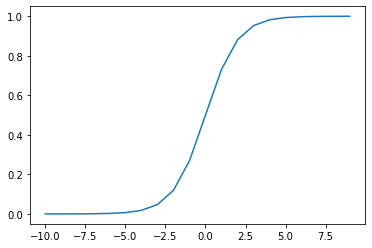

In [226]:
# Sigmoid function - Maps every values between 0 - 1
sigmoid = lambda X:  1 / (1+np.exp(-X))
x = np.arange(-10,10)
plt.plot(x, sigmoid(x))
plt.show()

In [162]:
class LogisticRegression2:
    '''
    Simple perceptron class
    '''
    def __init__(self, n_iter = 100, lr = 0.1):
        '''
        Define constant parameters
        param n_iter: n iterations
        param lr: learning rate
        '''
        self.lr = lr
        self.n_iter = n_iter
        self.cost = []
        self.fit_called = False
        self.classes = []
        
    def transform_labels(self, y):
        self.classes = np.unique(y)
        y_ = y.copy()
        if len(self.classes) > 2:
            raise ValueError("Wrong number of classes")
        else:
            class_one = np.where(y == self.classes[0])
            class_two = np.where(y == self.classes[1])
            y_[class_one] = 0
            y_[class_two] = 1
        return y_
    
    def fit(self, X, y):
        '''
        Fitting model.
        param X: feature array
        param y: labels
        '''
        y_transformed = y
        if isinstance(X, (list, tuple)):
            X = np.array(X)
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
        self.w = np.random.randn(X_bias.shape[1])
        self.fit_called = True
        for i in range(self.n_iter):
            output = self.activation(X_bias.dot(self.w))
            # Gradient descent minimazing error
            error = (y_transformed - output)
            self.w += self.lr  * X_bias.T.dot(error)
        return self

    
    def predict_probs(self, X):
        '''
        Return decision values
        '''
        assert self.fit_called, 'Call "Fit" before this'
        if isinstance(X, (list, tuple)):
            X = np.array(X)
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
        return self.activation(X_bias.dot(self.w))
    
    def activation(self, X):
        return 1 / (1+np.exp(-X))
    
    def predict(self, X):
        '''
        Return 1 or -1 depends on decision value
        1 => decision > 0
        -1 => decision < 0
        '''
        return np.where(self.predict_probs(X) > 0.5, self.classes[1], self.classes[0])

In [91]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [92]:
iris = load_iris()
X = iris.data[:, [2,3]]
y = iris.target
# y = np.where(y == 0 , 0, 1)
y = np.where(y == 0 , 2, 1)
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [93]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

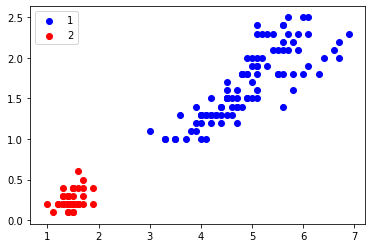

In [94]:
class_one = np.unique(y)[0]
class_two = np.unique(y)[1]
plt.scatter(X[y==class_one, 0], X[y==class_one, 1], c = 'blue', label = class_one)
plt.scatter(X[y==class_two, 0], X[y==class_two, 1], c = 'red', label = class_two)
plt.legend()
plt.show()

In [95]:
logistic = LogisticRegression2(100, 0.001)
logistic.fit(X_scaled, y)

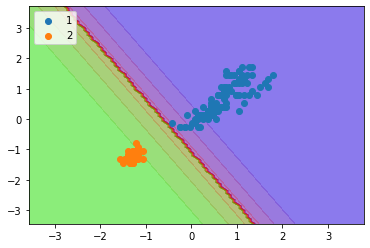

In [96]:
mesh_grid_visual(X_scaled, y, logistic)

In [98]:
logistic.predict([[2, 1]])

array([1])

### OvR

In [202]:
from itertools import combinations

In [211]:
# Load data
iris = load_iris()
X = iris.data[:, [2,3]]
y = iris.target
# Shuffle
index = np.random.permutation(len(y))
X = X[index]
y = y[index]

In [212]:
# Scale data
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

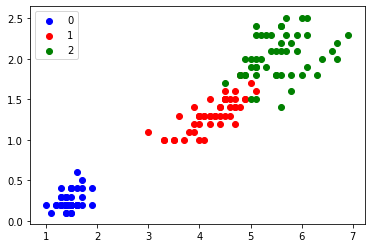

In [215]:
# Plot data
class_one = np.unique(y)[0]
class_two = np.unique(y)[1]
class_three = np.unique(y)[2]
plt.scatter(X[y==class_one, 0], X[y==class_one, 1], c = 'blue', label = class_one)
plt.scatter(X[y==class_two, 0], X[y==class_two, 1], c = 'red', label = class_two)
plt.scatter(X[y==class_three, 0], X[y==class_three, 1], c = 'green', label = class_three)
plt.legend()
plt.show()

In [213]:
# Making 3 classifiers one for each class
OvR = []
for class_ in np.unique(y):
    y_ = y.copy()
    positive = np.where(y == class_)
    negative = np.where(y != class_)
    y_[positive] = 1
    y_[negative] = 0
    OvR.append(LogisticRegression2(100, 0.01).fit(X_scaled, y_))

In [216]:
# Predicting classes
probas = []
for estimator in OvR:
    probas.append(estimator.predict_probs(X_scaled).reshape(-1,1))

In [220]:
# Chosing estimator with highest probability
predicted = np.argmax(np.c_[probas[0], probas[1], probas[2]], axis = 1)
predicted

array([0, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 0, 1,
       2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 2, 1, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1, 1, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 1, 2, 1, 2, 2, 0, 0, 0, 2,
       1, 0, 1, 0, 0, 2, 1, 0, 1, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0,
       1, 2, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0, 1,
       2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2])

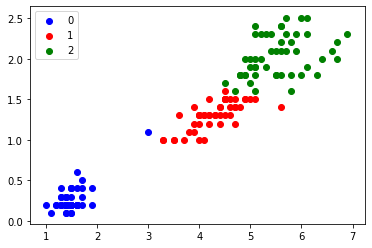

In [221]:
# Plot predicted classes
class_one = np.unique(predicted)[0]
class_two = np.unique(predicted)[1]
class_three = np.unique(predicted)[2]
plt.scatter(X[predicted==class_one, 0], X[predicted==class_one, 1], c = 'blue', label = class_one)
plt.scatter(X[predicted==class_two, 0], X[predicted==class_two, 1], c = 'red', label = class_two)
plt.scatter(X[predicted==class_three, 0], X[predicted==class_three, 1], c = 'green', label = class_three)
plt.legend()
plt.show()

In [231]:
sum(y == predicted)/ len(predicted)

0.9466666666666667